In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr 26 17:02:49 2020

@author: nyzw
"""

#install packages if needed
#pip install #####


#import modules
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import rcParams
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.stats import shapiro
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.anova import anova_lm

In [3]:
#Import in xlsx file
GraduateEarn = pd.read_excel('GraduateEarnings.xlsx')

In [4]:
#Look at data - visually look! 
#(may also open data frame in IDE to get a "cleaner" look)

#Look at the dataset dimensions
GraduateEarn.shape

(706, 10)

In [5]:
#Check the variable types
GraduateEarn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   School          706 non-null    object 
 1   Public          706 non-null    int64  
 2   Location        706 non-null    object 
 3   Earn            706 non-null    int64  
 4   SAT             706 non-null    int64  
 5   ACT             706 non-null    int64  
 6   Price           706 non-null    int64  
 7   Price_with_aid  706 non-null    int64  
 8   need_fraction   687 non-null    float64
 9   merit_aided     645 non-null    float64
dtypes: float64(2), int64(6), object(2)
memory usage: 55.3+ KB


In [6]:
#Summary Statistics for dataset
SummaryResults = GraduateEarn.describe(include='all')

In [8]:
#Simple linear regression (1 DV, 1 IV - both continuous)
#X will be our  independent variable(s)
X = GraduateEarn["Price"] 
#Y will be our dependent variable
Y = GraduateEarn["Earn"] 
#we need to add an intercept on our model
X = sm.add_constant(X)
#create our linear model
EarnCostModel = sm.OLS(Y, X).fit() 
EarnCostModel.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Earn   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     63.17
Date:                Mon, 04 May 2020   Prob (F-statistic):           7.55e-15
Time:                        06:35:41   Log-Likelihood:                -7193.2
No. Observations:                 706   AIC:                         1.439e+04
Df Residuals:                     704   BIC:                         1.440e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.042e+04    695.108     58.150      0.000    3.91e+04    4.18e+04
Price          0.1227      0.015      7.948      0.000       0.092       0.153
==============================================================================
Omnibus:                      114.947   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.069
Skew:                           0.977   Prob(JB):                     1.09e-45
Kurtosis:                       4.794   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

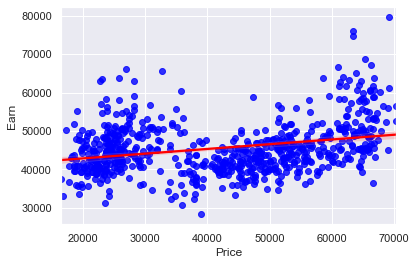

In [9]:
#Plot the regression model
sns.set(color_codes=True)
ax = sns.regplot(x="Price", y = "Earn", data  = GraduateEarn,
                     scatter_kws = {"color": "blue"},
                     line_kws = {"color": "red"})

In [10]:
#Calculate Predicted Values on current dataset
GraduateEarn['Y_EarnCostModel'] = EarnCostModel.predict(X)

In [11]:
#Assessing prediction accuracy
#Create Training and Test data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.20, random_state = 123)
#Build the model on training data
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_train_pred = lr.predict(X_train)
#Predict earnings on test data using model from training data
Y_test_pred = lr.predict(X_test)

In [12]:
#compare RMSE between train and test datasets
print("RMSE training data = ", np.sqrt(metrics.mean_squared_error(Y_train, Y_train_pred)))
print("RMSE testing data = ", np.sqrt(metrics.mean_squared_error(Y_test, Y_test_pred)))

RMSE training data =  6468.666972236126
RMSE testing data =  6311.0784874789315


Correlation
0.23242531118921078


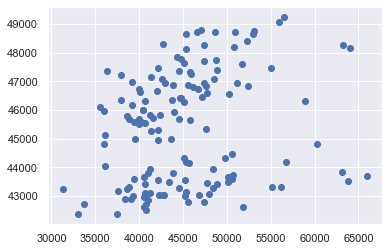

In [13]:
#look at correlation between actual and predicited in test data
from scipy.stats import pearsonr
stat, p = pearsonr(Y_test, Y_test_pred)
print('Correlation')
print(stat)
plt.scatter(x=Y_test , y=Y_test_pred)

In [14]:
#Diagnostics for our simple linear regression (Full Model)
EarnCostModel = sm.OLS(Y, X).fit() 
EarnCostModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Earn   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     63.17
Date:                Mon, 04 May 2020   Prob (F-statistic):           7.55e-15
Time:                        06:37:51   Log-Likelihood:                -7193.2
No. Observations:                 706   AIC:                         1.439e+04
Df Residuals:                     704   BIC:                         1.440e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.042e+04    695.108     58.150      0.000    3.91e+04    4.18e+04
Price          0.1227      0.015      7.948      0.000       0.092       0.153
==============================================================================
Omnibus:                      114.947   Durbin-Watson:                   1.816
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.069
Skew:                           0.977   Prob(JB):                     1.09e-45
Kurtosis:                       4.794   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

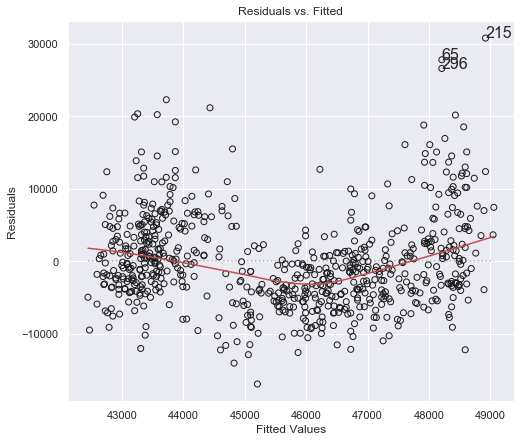

In [15]:
#Residuals vs Fitted Plot
residuals = EarnCostModel.resid
fitted = EarnCostModel.fittedvalues
smoothed = lowess(residuals,fitted)
top3 = abs(residuals).sort_values(ascending = False)[:3]

plt.rcParams.update({'font.size': 16})
plt.rcParams["figure.figsize"] = (8,7)
fig, ax = plt.subplots()
ax.scatter(fitted, residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Residuals')
ax.set_xlabel('Fitted Values')
ax.set_title('Residuals vs. Fitted')
ax.plot([min(fitted),max(fitted)],[0,0],color = 'k',linestyle = ':', alpha = .3)

for i in top3.index:
    ax.annotate(i,xy=(fitted[i],residuals[i]))

plt.show()

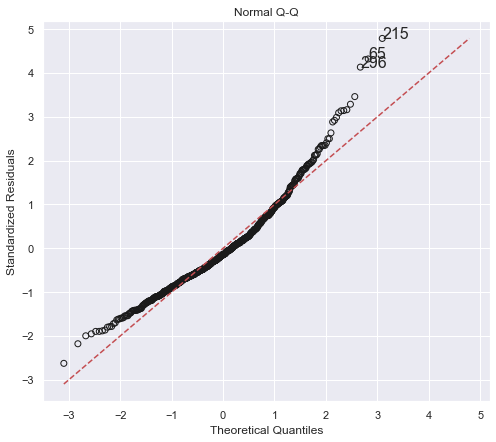

In [16]:
#Normal Q-Q plot
sorted_student_residuals = pd.Series(EarnCostModel.get_influence().resid_studentized_internal)
sorted_student_residuals.index = EarnCostModel.resid.index
sorted_student_residuals = sorted_student_residuals.sort_values(ascending = True)
df = pd.DataFrame(sorted_student_residuals)
df.columns = ['sorted_student_residuals']
df['theoretical_quantiles'] = stats.probplot(df['sorted_student_residuals'], dist = 'norm', fit = False)[0]
rankings = abs(df['sorted_student_residuals']).sort_values(ascending = False)
top3 = rankings[:3]

fig, ax = plt.subplots()
x = df['theoretical_quantiles']
y = df['sorted_student_residuals']
ax.scatter(x,y, edgecolor = 'k',facecolor = 'none')
ax.set_title('Normal Q-Q')
ax.set_ylabel('Standardized Residuals')
ax.set_xlabel('Theoretical Quantiles')
ax.plot([np.min([x,y]),np.max([x,y])],[np.min([x,y]),np.max([x,y])], color = 'r', ls = '--')
for val in top3.index:
    ax.annotate(val,xy=(df['theoretical_quantiles'].loc[val],df['sorted_student_residuals'].loc[val]))
plt.show()


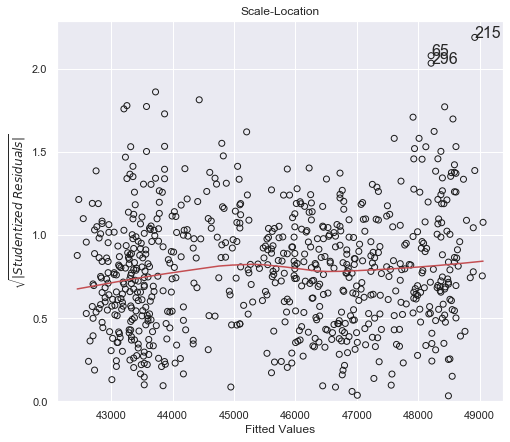

In [17]:
#Scale - Location Plot
student_residuals = EarnCostModel.get_influence().resid_studentized_internal
sqrt_student_residuals = pd.Series(np.sqrt(np.abs(student_residuals)))
sqrt_student_residuals.index = EarnCostModel.resid.index
smoothed = lowess(sqrt_student_residuals,fitted)
top3 = abs(sqrt_student_residuals).sort_values(ascending = False)[:3]

fig, ax = plt.subplots()
ax.scatter(fitted, sqrt_student_residuals, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('$\sqrt{|Studentized \ Residuals|}$')
ax.set_xlabel('Fitted Values')
ax.set_title('Scale-Location')
ax.set_ylim(0,max(sqrt_student_residuals)+0.1)
for i in top3.index:
    ax.annotate(i,xy=(fitted[i],sqrt_student_residuals[i]))
plt.show()

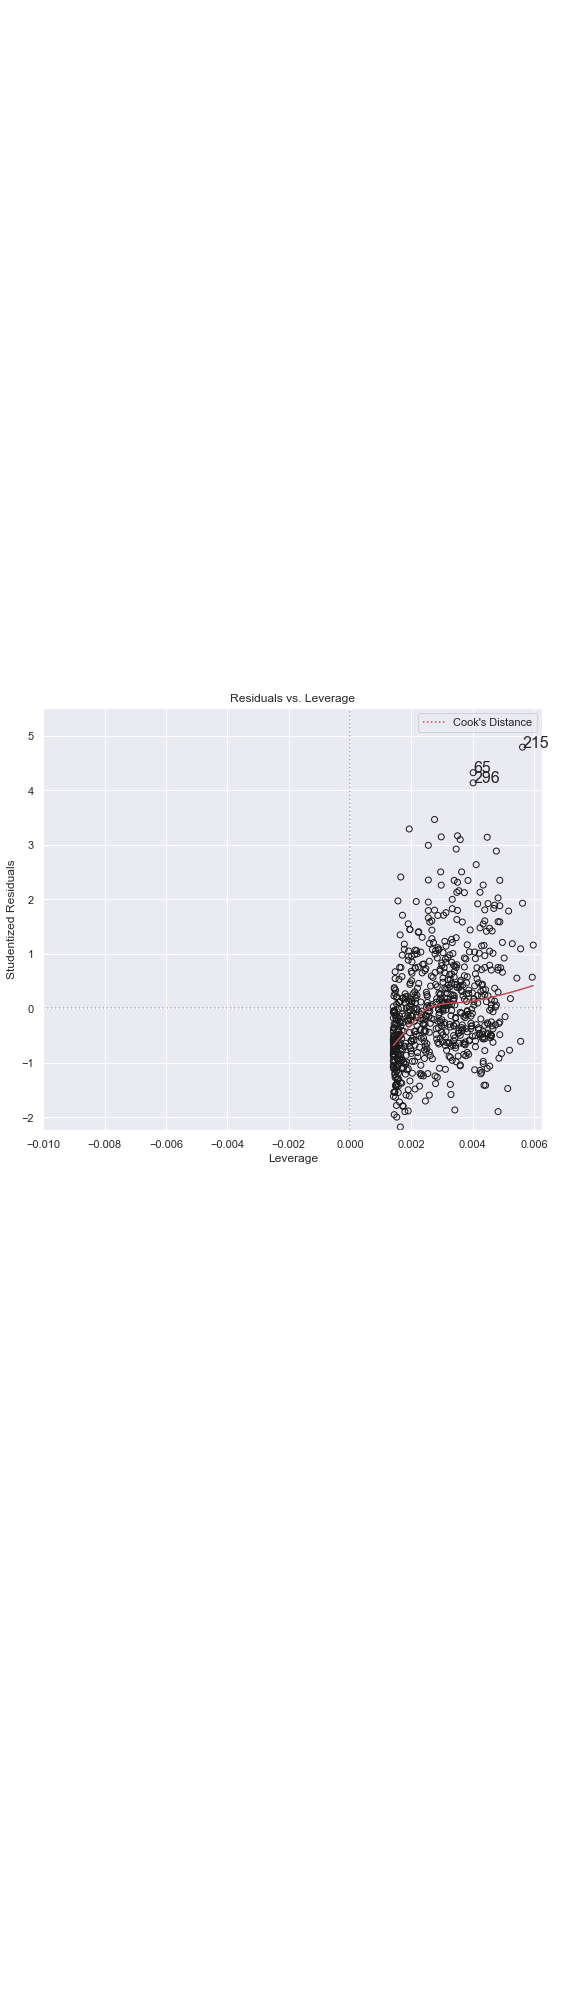

In [18]:
#Residuals vs. Leverage
student_residuals = pd.Series(EarnCostModel.get_influence().resid_studentized_internal)
student_residuals.index = EarnCostModel.resid.index
df = pd.DataFrame(student_residuals)
df.columns = ['student_residuals']
df['leverage'] = EarnCostModel.get_influence().hat_matrix_diag
smoothed = lowess(df['student_residuals'],df['leverage'])
sorted_student_residuals = abs(df['student_residuals']).sort_values(ascending = False)
top3 = sorted_student_residuals[:3]

fig, ax = plt.subplots()
x = df['leverage']
y = df['student_residuals']
xpos = max(x)+max(x)*0.01  
ax.scatter(x, y, edgecolors = 'k', facecolors = 'none')
ax.plot(smoothed[:,0],smoothed[:,1],color = 'r')
ax.set_ylabel('Studentized Residuals')
ax.set_xlabel('Leverage')
ax.set_title('Residuals vs. Leverage')
ax.set_ylim(min(y)-min(y)*0.15,max(y)+max(y)*0.15)
ax.set_xlim(-0.01,max(x)+max(x)*0.05)
plt.tight_layout()
for val in top3.index:
    ax.annotate(val,xy=(x.loc[val],y.loc[val]))

cooksx = np.linspace(min(x), xpos, 50)
p = len(EarnCostModel.params)
poscooks1y = np.sqrt((p*(1-cooksx))/cooksx)
poscooks05y = np.sqrt(0.5*(p*(1-cooksx))/cooksx)
negcooks1y = -np.sqrt((p*(1-cooksx))/cooksx)
negcooks05y = -np.sqrt(0.5*(p*(1-cooksx))/cooksx)

ax.plot(cooksx,poscooks1y,label = "Cook's Distance", ls = ':', color = 'r')
ax.plot(cooksx,poscooks05y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks1y, ls = ':', color = 'r')
ax.plot(cooksx,negcooks05y, ls = ':', color = 'r')
ax.plot([0,0],ax.get_ylim(), ls=":", alpha = .3, color = 'k')
ax.plot(ax.get_xlim(), [0,0], ls=":", alpha = .3, color = 'k')
ax.annotate('1.0', xy = (xpos, poscooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, poscooks05y[-1]), color = 'r')
ax.annotate('1.0', xy = (xpos, negcooks1y[-1]), color = 'r')
ax.annotate('0.5', xy = (xpos, negcooks05y[-1]), color = 'r')
ax.legend()
plt.show()

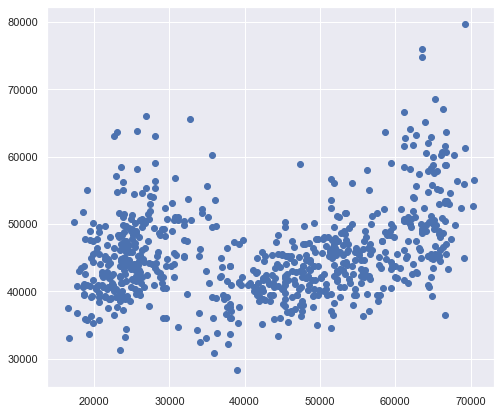

In [19]:
#Statistical Assumptions
#Linearity (DV and IV)
plt.scatter(x=GraduateEarn['Price'] , y=GraduateEarn['Earn'])

Shapiro Statistic=0.925, p=0.000


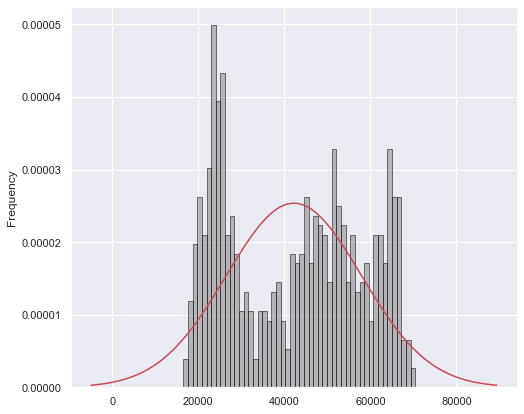

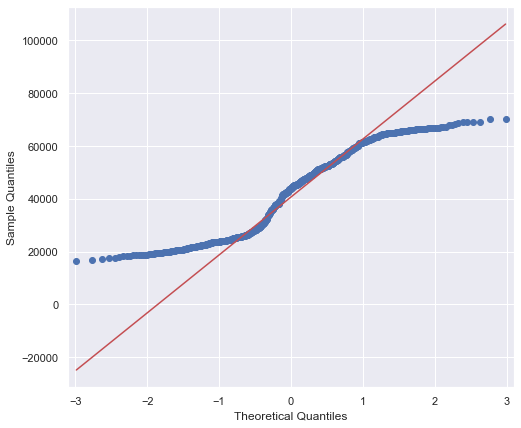

In [20]:
#Normality
#For the IV
stat, p = shapiro(GraduateEarn['Price'])
print('Shapiro Statistic=%.3f, p=%.3f' % (stat, p))

GraduateEarn['Price'].plot.hist(alpha=0.5, bins=50, grid=True, 
            legend=None, density = True, color = 'gray', edgecolor = 'black')
mu = GraduateEarn['Price'].mean()
variance = GraduateEarn['Price'].var()
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color = 'r')
plt.show()

qqplot(GraduateEarn['Price'], line='q')
plt.show()

Shapiro Statistic=0.953, p=0.000


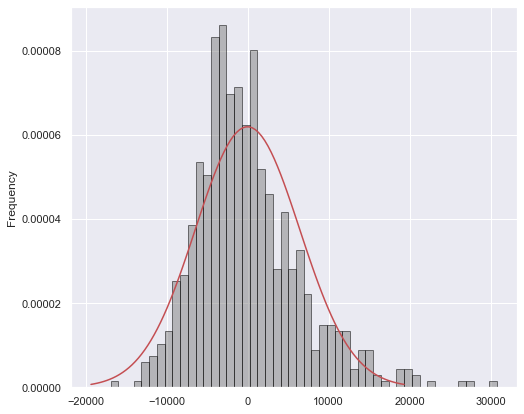

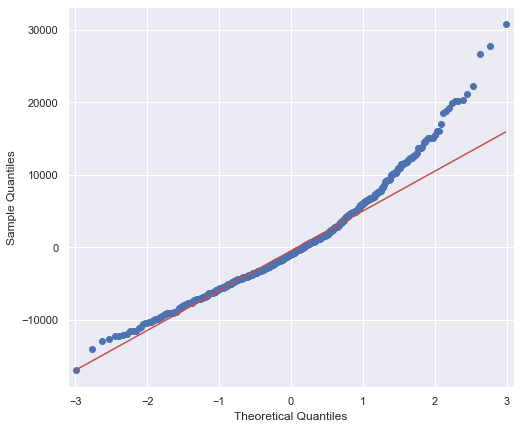

In [21]:
#For the Residuals
stat, p = shapiro(residuals)
print('Shapiro Statistic=%.3f, p=%.3f' % (stat, p))

residuals.plot.hist(alpha=0.5, bins=50, grid=True, 
                    legend=None, density = True, color = 'gray', edgecolor = 'black')
mu = residuals.mean()
variance = residuals.var()
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color = 'r')
plt.show()

qqplot(residuals, line='q')
plt.show()

In [22]:
#Multicollinearity
#Grab the numerical data for the correlation matrix
df_sub = pd.DataFrame(GraduateEarn, columns=['Earn', 'Price', 'SAT', 'ACT'])
corrmatrix = df_sub.corr()
print(corrmatrix)

           Earn     Price       SAT       ACT
Earn   1.000000  0.286945  0.553771  0.550898
Price  0.286945  1.000000  0.498560  0.541724
SAT    0.553771  0.498560  1.000000  0.936266
ACT    0.550898  0.541724  0.936266  1.000000


In [23]:
# Calculate VIF for IVs
y, X = dmatrices(formula_like="Earn ~ Price + SAT + ACT ", data=GraduateEarn, return_type="dataframe")
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('Price VIF =', vif[1])
print('SAT VIF =', vif[2])
print('ACT VIF =', vif[3])

Price VIF = 1.4165696782611905
SAT VIF = 8.110279997133745
ACT VIF = 8.625713637200827


In [24]:
#Autocorrelation
print('Durbin-Watson =', durbin_watson(residuals))

Durbin-Watson = 1.8161507938613066


In [25]:
#Multivariate regression
MultReg = smf.ols('Earn ~ Price + SAT + Public', data = GraduateEarn).fit()
MultReg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Earn   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 04 May 2020   Prob (F-statistic):           2.19e-76
Time:                        06:44:38   Log-Likelihood:                -7045.7
No. Observations:                 706   AIC:                         1.410e+04
Df Residuals:                     702   BIC:                         1.412e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.05e+04   1742.734      6.024      0.000    7075.906    1.39e+04
Price          0.2981      0.032      9.268      0.000       0.235       0.361
SAT           16.6125      1.950      8.518      0.000      12.783      20.441
Public      9355.2181    920.576     10.162      0.000    7547.806    1.12e+04
==============================================================================
Omnibus:                       80.685   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.548
Skew:                           0.734   Prob(JB):                     4.98e-31
Kurtosis:                       4.610   Cond. No.                     4.02e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
#Model Selection
#Comparison with ANOVA
BaseModel = smf.ols('Earn ~ Price + SAT + Public', data = GraduateEarn).fit()
Model1 = smf.ols('Earn ~ Price + SAT', data = GraduateEarn).fit()
Model2 = smf.ols('Earn ~ Price', data = GraduateEarn).fit()
AnovaResults_M1_M2 = anova_lm(Model2, Model1)
print(AnovaResults_M1_M2)
AnovaResults_M1_BM = anova_lm(BaseModel, Model1)
print(AnovaResults_M1_BM)


   df_resid           ssr  df_diff       ss_diff           F        Pr(>F)
0     704.0  2.924952e+10      0.0           NaN         NaN           NaN
1     703.0  2.209439e+10      1.0  7.155131e+09  227.662141  9.048339e-45
   df_resid           ssr  df_diff       ss_diff          F  Pr(>F)
0     702.0  1.926087e+10      0.0           NaN        NaN     NaN
1     703.0  2.209439e+10     -1.0 -2.833526e+09  90.157211     NaN


C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\lpzq\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [28]:
#Stepwise Regression
DataSubset = pd.DataFrame(GraduateEarn, columns=['Earn', 'Price', 'SAT', 'Public'])

def forward_selected(data, response):
    """Linear model designed by forward selection.

    Parameters:
    -----------
    data : pandas DataFrame with all possible predictors and response

    response: string, name of response column in data

    Returns:
    --------
    model: an "optimal" fitted statsmodels linear model
           with an intercept
           selected by forward selection
           evaluated by adjusted R-squared
    """
    remaining = set(data.columns)
    remaining.remove(response)
    selected = []
    current_score, best_new_score = 0.0, 0.0
    while remaining and current_score == best_new_score:
        scores_with_candidates = []
        for candidate in remaining:
            formula = "{} ~ {} + 1".format(response,
                                           ' + '.join(selected + [candidate]))
            score = smf.ols(formula, data).fit().rsquared_adj
            scores_with_candidates.append((score, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates.pop()
        if current_score < best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
    formula = "{} ~ {} + 1".format(response,
                                   ' + '.join(selected))
    model = smf.ols(formula, data).fit()
    return model

model = forward_selected(DataSubset, 'Earn')
print('Model Selected')
print(model.model.formula)
print('R2=', model.rsquared_adj)

Model Selected
Earn ~ SAT + Public + Price + 1
R2= 0.39313498854924545
